In [1]:
import mlflow

ModuleNotFoundError: No module named 'mlflow'

In [1]:
from digipat.models.segmentation import SegmentationModel
from digipat.data.datasets.examples.bcss import (
    BCSS_OOD_Dataset,
    BCSS_Base_Dataset,
    BCSS_Adapted_Datasets,
    BCSS_Adapted_Cropped_Resized_Datasets,
)
from digipat.data.datasets.interfaces import OODDataset, OODAugmentationDataset
from digipat.ood.augmentations import *
from digipat.data.metadata import SampleMetadataCommonTypes
from digipat.data.container import MetadataContainer
from digipat.ood.metrics import OODAuRoC, infer_container
from digipat.ood.strategies import AugmentationStrategy
from digipat.ood.methods import ODIN, EnergyBased, MaxClassBaseline
from digipat.ood.augmentations.utility.pipeline import SizeInOODPipeline
from digipat.ood.augmentations.indistribution import InResize, InCrop
from digipat.ood.augmentations.pathology.deforming import OverlapAugmentation
from digipat.ood.augmentations.pathology.artifacts.blood_group import (
    BloodGroupAugmentation,
)
from digipat.experiment.components.examples import (
    AugmentationOODEvaluationComponent,
    DatasetOODEvaluationComponent,
)
from digipat.data.datasets.adapter import AlreadyASampleAdapter

import matplotlib.pyplot as plt
import tqdm
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, ConcatDataset



OODAugmentationDataset(
    BCSS_Adapted_Cropped_Resized_Datasets().test,
    SizeInOODPipeline(
        ood_augmentations=[SampledOODAugmentation(SquamousAugmentation())],
    )
).sample(10)


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


UnboundLocalError: local variable 'img' referenced before assignment

: 

In [ ]:
for i in AugmentationStrategy(AlreadyASampleAdapter(OODDataset(BCSS_Adapted_Cropped_Resized_Datasets().test)), SizeInOODPipeline(
        ood_augmentations=[SampledOODAugmentation(FatAugmentation())],
    )).get_dataloader():
    print(i.metadata["type"])

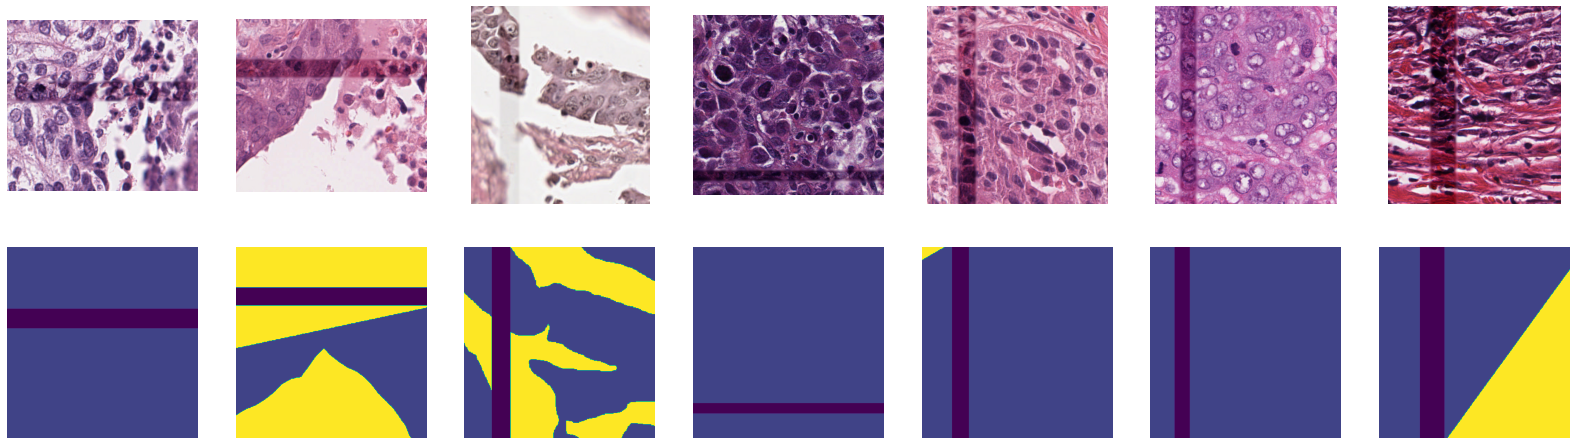

In [390]:
aug = OverlapAugmentation()
BCSS_OOD_Dataset(bcss_base=BCSS_Base_Dataset(resize_size=(350,350), crop_size=(700,700),size=(700,700)),augmentation=aug).sample(7)



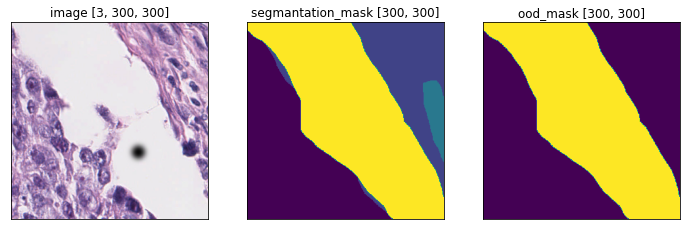

DistributionSampleType.IN_DATA - dict_items([('type', <DistributionSampleType.IN_DATA: 2>), ('ignore_index', 5)])


In [12]:
from digipat.data.samples import Sample, Batch
from digipat.data.datasets.examples.bcss import BCSS_OOD_Dataset, BCSS_Base_Dataset, BCSS_Adapted_Dataset
from digipat.data.datasets.adapter.adapter import (
    PositionalAdapter,
    ImageLabelMetaAdapter,
)
from digipat.data.datasets.adapter.utils import create_mapping_dict
from digipat.data.datatypes import DistributionSampleType
from digipat.data.metadata import SampleMetadata
import matplotlib.pyplot as plt
from digipat.ood.augmentations.pathology.artifacts import *
from digipat.ood.augmentations.utility.pipeline import SizeInOODPipeline
from digipat.ood.augmentations.indistribution import InResize, InCrop
from digipat.ood.augmentations.pathology.deforming import OverlapAugmentation


adapter = ImageLabelMetaAdapter(BCSS_Base_Dataset(size=(620,620)), ignore_index=5)
# adapter.sample(7)

a = SizeInOODPipeline(size_augmentations=[] , in_augmentations=[InCrop((600,600)), InResize(resize_size=(300,300))], ood_augmentations=[DarkSpotsAugmentation(0.2, keep_ignorred=True)])

a(adapter[1000]).plot()


In [5]:
overlay = 50
shuffle = 3
sigma = 1.5
import random

flip = random.uniform(0,1) > 0.5

start = int(
    random.uniform(
        overlay, npimg.shape[0] - 2*overlay if not flip else npimg.shape[1] - 2*overlay
    )
)
start = npimg.shape[0] - 2*overlay
print(start, overlay)

from skimage.filters import gaussian


def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
    return result


part1 = np.ones((npimg.shape[0] - overlay, npimg.shape[1], 3))
part2 = np.ones((npimg.shape[0] - overlay, npimg.shape[1], 3))
print(part1.shape)

if flip:
    npimg = npimg.transpose(1, 0, 2)

part1[start:, ...] = npimg[start + overlay :, ...]
part2[: start + overlay, ...] = npimg[: start + overlay, ...]

result = part1 * part2
shuffle1 = result[start - shuffle : start + shuffle, ...]
shuffle1 = gaussian(shuffle1, sigma=sigma, multichannel=True)
result[start - shuffle : start + shuffle, ...] = shuffle1

shuffle2 = result[start + overlay - shuffle : start + overlay + shuffle, ...]
shuffle2 = gaussian(shuffle2, sigma=sigma, multichannel=True)
result[start + overlay - shuffle : start + overlay + shuffle, ...] = shuffle2

if flip:
    result = result.transpose(1, 0, 2)
    part1 = part1.transpose(1, 0, 2)
    part2 = part2.transpose(1, 0, 2)
    npimg = npimg.transpose(1, 0, 2)


plot_imgs(part1, part2, result)


NameError: name 'npimg' is not defined

In [3]:
container[0].metaframe

,type,OOD_SCORE.0_MaxClassBaseline,OOD_SCORE.1_ODIN,OOD_SCORE.2_EnergyBased,OOD_REASON,OOD_SEVERITY
0,DistributionSampleType.IN_DATA,0.945204,0.856117,4.047712,NaN,NaN
1,DistributionSampleType.OOD_DATA,0.922269,0.850095,3.606822,OODReason.AUGMENTATION_OOD,PixelPercentage [0-1]: 0.0727333351969719
2,DistributionSampleType.OOD_DATA,0.955794,0.767361,3.641944,OODReason.AUGMENTATION_OOD,PixelPercentage [0-1]: 0.8094221949577332
3,DistributionSampleType.IN_DATA,0.988795,0.850593,4.387804,NaN,NaN
4,DistributionSampleType.IN_DATA,0.943523,0.948003,5.573709,NaN,NaN
...,...,...,...,...,...,...
15232,DistributionSampleType.IN_DATA,0.890632,0.846623,3.545717,NaN,NaN
15233,DistributionSampleType.IN_DATA,0.969188,0.869987,3.692738,NaN,NaN
15234,DistributionSampleType.OOD_DATA,0.927643,0.768093,3.546924,OODReason.AUGMENTATION_OOD,PixelPercentage [0-1]: 0.9846888780593872
15235,DistributionSampleType.OOD_DATA,0.962215,0.832451,3.665650,OODReason.AUGMENTATION_OOD,PixelPercentage [0-1]: 0.3379777669906616


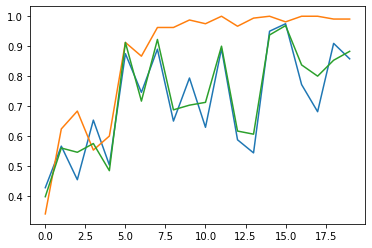

Name                               AUC
----------------------------  --------
OOD_SCORE.0_MaxClassBaseline  0.691719
OOD_SCORE.1_ODIN              0.822188
OOD_SCORE.2_EnergyBased       0.699688


In [20]:
for m in metrics:
    m(container, {})
    m.present()

In [3]:
t = container[0].metaframe

In [14]:
in_d = t[(t["type"] == DistributionSampleType.IN_DATA)]
t["bin"] = t["OOD_SEVERITY"].apply(lambda x: x.get_bin(10) if not pd.isna(x) else None)
od_d = t[(t["type"] == DistributionSampleType.OOD_DATA)].groupby("bin")
d_col = [col for col in t if col.startswith(f"{MetadataCommonTypes.OOD_SCORE.name}.")]

print(in_d[d_col].to_numpy())
ood_nested_list = od_d[d_col].apply(lambda x: x.values.tolist()).tolist()
print(ood_nested_list[0][0].__len__())
group_keys = od_d[d_col].groups.keys()

for i, g_k in enumerate(group_keys):
        group_array = np.array(ood_nested_list[i])
        print(group_array.shape)


[[0.92389035 0.87533647 3.5593965 ]
 [0.94760615 0.8359803  3.685302  ]
 [0.94832206 0.85631496 3.733188  ]
 [0.94323003 0.84102124 3.6675391 ]
 [0.95110714 0.8496221  3.7241695 ]
 [0.9618157  0.8231528  3.854208  ]
 [0.98498964 0.8371119  3.9649193 ]
 [0.9872153  0.9756489  4.5679603 ]
 [0.9888574  0.97117984 4.6788077 ]
 [0.96790093 0.88533854 3.7843442 ]
 [0.96479464 0.8476159  3.7739418 ]
 [0.96498907 0.82996565 3.8229992 ]
 [0.94273126 0.8468528  3.6979208 ]
 [0.97448194 0.8434435  3.8879    ]
 [0.9929835  0.9838268  4.7519445 ]
 [0.99280167 0.9758616  4.7293367 ]
 [0.9309308  0.79028106 3.8988843 ]
 [0.9362447  0.8328053  3.6691053 ]
 [0.9608033  0.86808306 3.795631  ]
 [0.9620141  0.93651164 4.0511985 ]
 [0.9830834  0.96452945 4.389062  ]
 [0.9414311  0.8434523  3.6555576 ]
 [0.9472843  0.8100232  3.8589597 ]
 [0.9464342  0.8499617  3.7256305 ]
 [0.96348834 0.8666326  3.7924397 ]
 [0.9470222  0.8857116  3.701381  ]
 [0.95910937 0.9325229  3.966458  ]
 [0.94806087 0.87347853 3.66

In [46]:
import pandas as pd

print(all[0].data)
test = pd.json_normalize([a.data for a in all])
DistributionSampleType.IN_DISTRIBUTION_DATA.name
test

defaultdict(<function dict_default at 0x000001ED31BCC310>, {'type': <DistributionSampleType.AUGMENTATION_OOD_DATA: 3>, 'OOD_SEVERITY': PixelPercentage [0-1]: 0.8070555329322815, 'OOD_SCORE': {'0_MaxClassBaseline': 0.95399994, '1_ODIN': 0.7659604, '2_EnergyBased': 3.6314614}})


,type,OOD_SEVERITY,OOD_SCORE.0_MaxClassBaseline,OOD_SCORE.1_ODIN,OOD_SCORE.2_EnergyBased
0,DistributionSampleType.AUGMENTATION_OOD_DATA,PixelPercentage [0-1]: 0.8070555329322815,0.954000,0.765960,3.631461
1,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.955697,0.919083,3.948238
2,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.949582,0.841722,3.643372
3,DistributionSampleType.AUGMENTATION_OOD_DATA,PixelPercentage [0-1]: 0.05165555700659752,0.961023,0.837734,3.891705
4,DistributionSampleType.AUGMENTATION_OOD_DATA,PixelPercentage [0-1]: 0.04721111059188843,0.950182,0.828156,3.796163
...,...,...,...,...,...
1595,DistributionSampleType.AUGMENTATION_OOD_DATA,PixelPercentage [0-1]: 0.08364444226026535,0.946027,0.865525,4.217421
1596,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.957214,0.907939,5.377982
1597,DistributionSampleType.AUGMENTATION_OOD_DATA,PixelPercentage [0-1]: 0.4543111026287079,0.951531,0.851290,5.022236
1598,DistributionSampleType.AUGMENTATION_OOD_DATA,PixelPercentage [0-1]: 0.6734222173690796,0.920955,0.753346,4.079607


In [51]:
test[test["type"] == DistributionSampleType.IN_DISTRIBUTION_DATA]
test["bin"] = test["OOD_SEVERITY"].apply(lambda x: x.get_bin(10) if not pd.isna(x) else None)
in_d = test[(test["type"] == DistributionSampleType.IN_DISTRIBUTION_DATA)]
in_d

,type,OOD_SEVERITY,OOD_SCORE.0_MaxClassBaseline,OOD_SCORE.1_ODIN,OOD_SCORE.2_EnergyBased,bin
1,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.955697,0.919083,3.948238,NaN
2,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.949582,0.841722,3.643372,NaN
6,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.975786,0.853905,3.842583,NaN
7,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.980347,0.853312,3.942138,NaN
14,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.952342,0.839062,3.724517,NaN
...,...,...,...,...,...,...
1587,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.921613,0.829729,3.551795,NaN
1588,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.978674,0.875985,4.185493,NaN
1590,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.980023,0.878146,4.149152,NaN
1591,DistributionSampleType.IN_DISTRIBUTION_DATA,NaN,0.974337,0.878608,4.232892,NaN


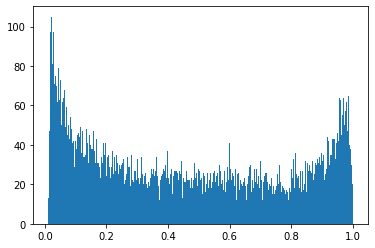

In [6]:
    # print(np.mean(score,tuple(range(1, score.ndim))))
    # all.extend(
    #    [
    #        m["severity"].measurement
    #        for m in meta
    #        if m.type is DistributionSampleType.AUGMENTATION_OOD_DATA
    #    ]
    # )

import numpy as np
plt.hist(all, 500)
plt.show()


In [52]:
data= {"test": 5, "lol": 3}
for key, val in data.items():
            print(key, val)

test 5
lol 3


In [ ]:

"""
shuffle1 = part1[start-1:start + 1,...]
shuffle2 = part2[start + overlay -1:start + overlay +1,...]
s = shuffle1.shape
shuffle1 = shuffle1.reshape(-1,3)
shuffle2 = shuffle2.reshape(-1,3)
np.random.shuffle(shuffle1)
np.random.shuffle(shuffle2)
plt.imshow(shuffle1.reshape(s))




l = 1
for i in range(0, shuffle1.shape[1],l):
  patch = shuffle1[:,i:i+l,:]
  s = patch.shape
  patch = patch.reshape(-1,3)
  np.random.shuffle(patch)
  new_patch = patch.reshape(s)
  shuffle1[:,i:i+l,:] = new_patch



for i in range(0, shuffle2.shape[1],l):
  patch = shuffle2[:,i:i+l,:]
  s = patch.shape
  patch = patch.reshape(-1,3)
  np.random.shuffle(patch)
  new_patch = patch.reshape(s)
  shuffle2[:,i:i+l,:] = new_patch

"""

#
#print(shuffle2.reshape(-1,3).shape)
#np.random.shuffle(shuffle2.reshape(-1,3))